## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

#### Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

#### Results Expected
A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation.
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.


In [1]:
## Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import metrics


In [2]:
##  For display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataset =  pd.read_csv("Leads.csv")
dataset.shape

(9240, 37)

In [4]:
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Check null values

In [6]:
dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
(dataset.isnull().sum()/dataset.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
## check for duplicates

dataset.duplicated().sum()

0

## EDA

### Data cleaning

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values or system generated number

dataset.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [11]:
dataset.shape

(9240, 35)

In [12]:
nullvar = (dataset.isnull().sum()/dataset.shape[0])*100

In [13]:
nullvar40 = nullvar[nullvar > 40].keys()
nullvar40

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
dataset.drop(nullvar40, axis=1, inplace=True)

In [15]:
dataset.shape

(9240, 30)

In [16]:
(dataset.isnull().sum()/dataset.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### The selected value in column is undefined so let transform all select values into nan and check again

In [17]:
dataset = dataset.replace("Select", np.nan)

In [18]:
nullvar = np.round(((dataset.isnull().sum()/dataset.shape[0])*100),2)
nullvar

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [19]:
nullvar40 = nullvar[nullvar>40].keys()
nullvar40

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [20]:
dataset.drop(nullvar40,inplace=True,axis=1)

In [21]:
dataset.shape

(9240, 28)

In [22]:
### Na values for Country

dataset.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [23]:
dataset.Country.mode()[0]

'India'

In [24]:
dataset.Country.fillna(dataset.Country.mode()[0], inplace=True)

In [25]:
dataset.Country.isnull().sum()

0

In [26]:
dataset.Country.value_counts()/len(dataset.Country)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

#### As we can see 97% of data is biased to India so we can drop this column as no need of taking it further

In [27]:
### As we can see 97% of data is biased to India so we can drop this column as no need of taking it further

dataset.drop("Country", axis=1, inplace=True)

In [28]:
dataset.shape

(9240, 27)

In [29]:
## check values of specilization

dataset.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

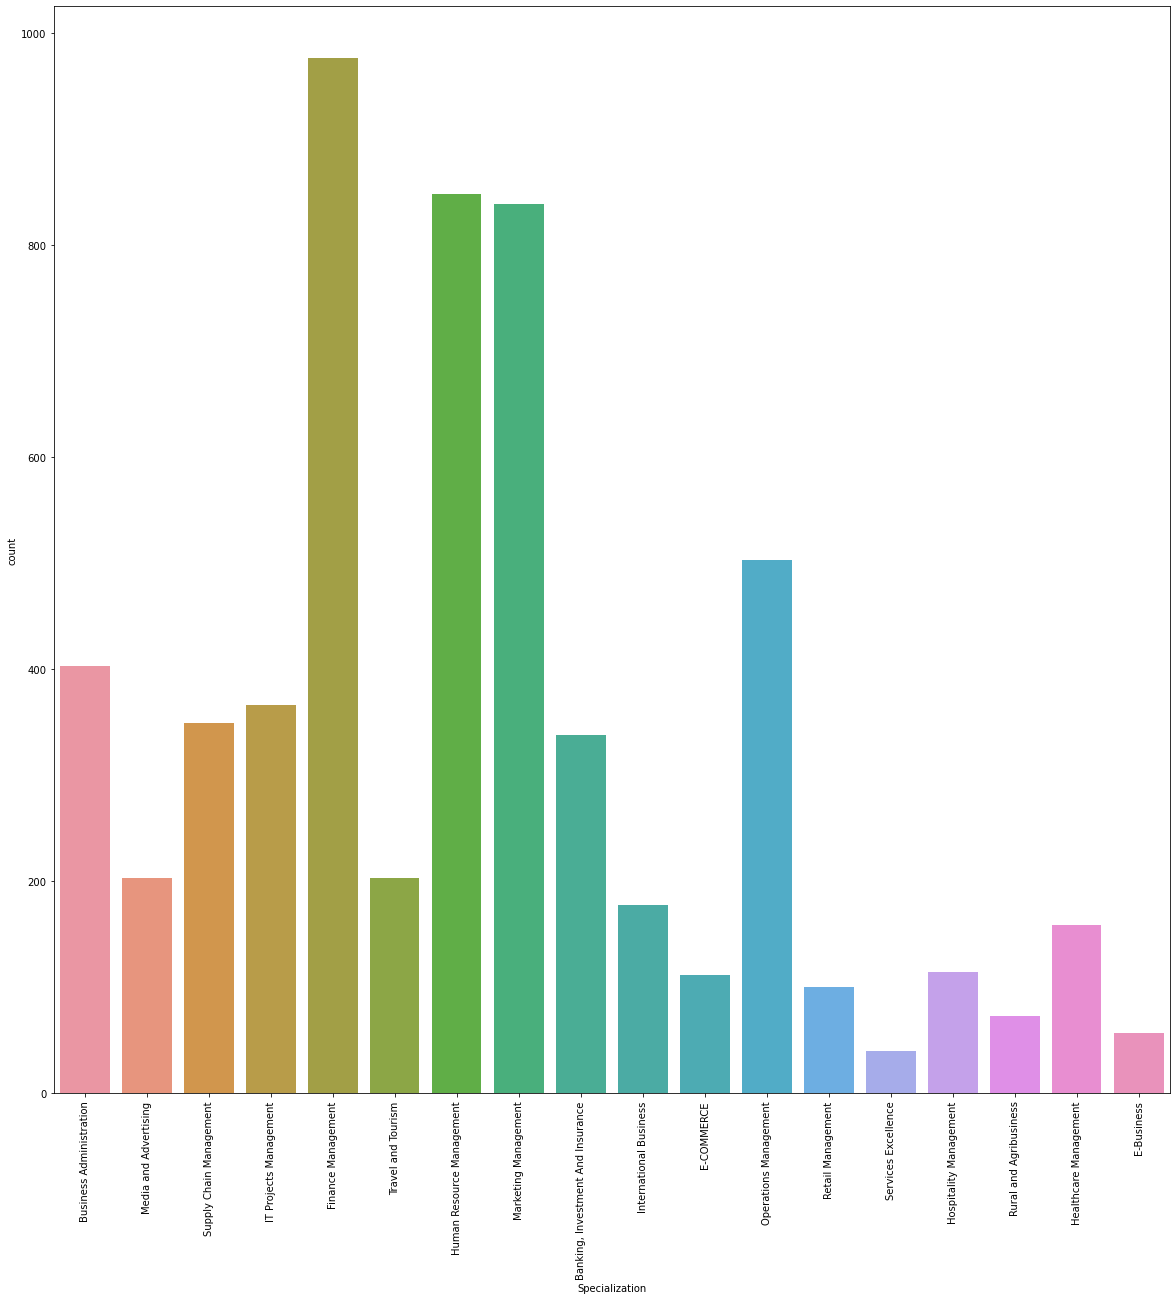

In [30]:
plt.figure(figsize=(20,20))
s1 = sns.countplot(dataset.Specialization)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

dataset['Specialization'] = dataset['Specialization'].replace(np.nan, 'Not Specified')

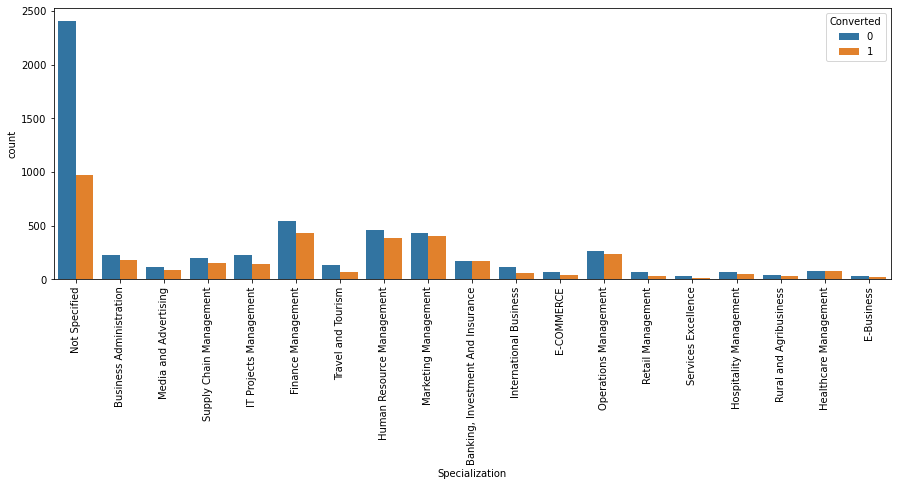

In [32]:
plt.figure(figsize=(15,5))
s1=sns.countplot(dataset.Specialization, hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#combining Management Specializations because they show similar trends

dataset['Specialization'] = dataset['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

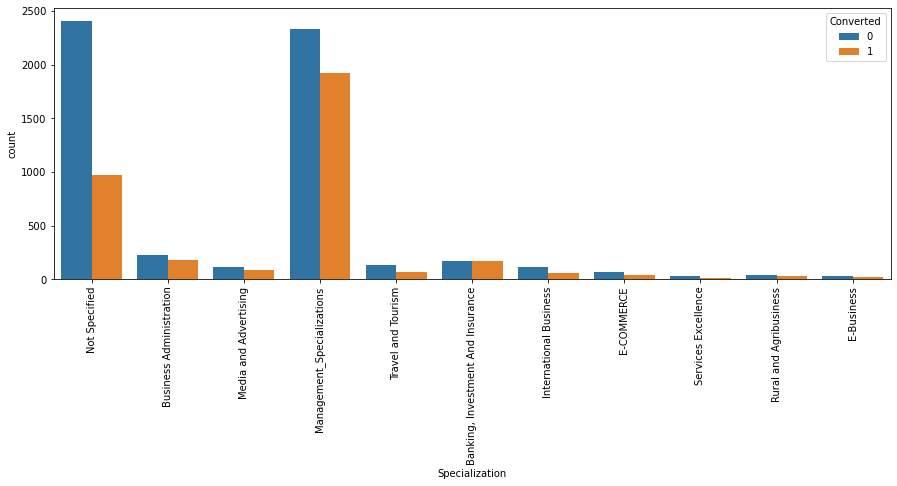

In [34]:
plt.figure(figsize=(15,5))
s1=sns.countplot(dataset.Specialization, hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
dataset.shape

(9240, 27)

In [36]:
dataset.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [37]:
dataset['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
#imputing Nan values with mode "Unemployed"

dataset['What is your current occupation'] = dataset['What is your current occupation'].replace(np.nan, 'Unemployed')

In [39]:
dataset['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

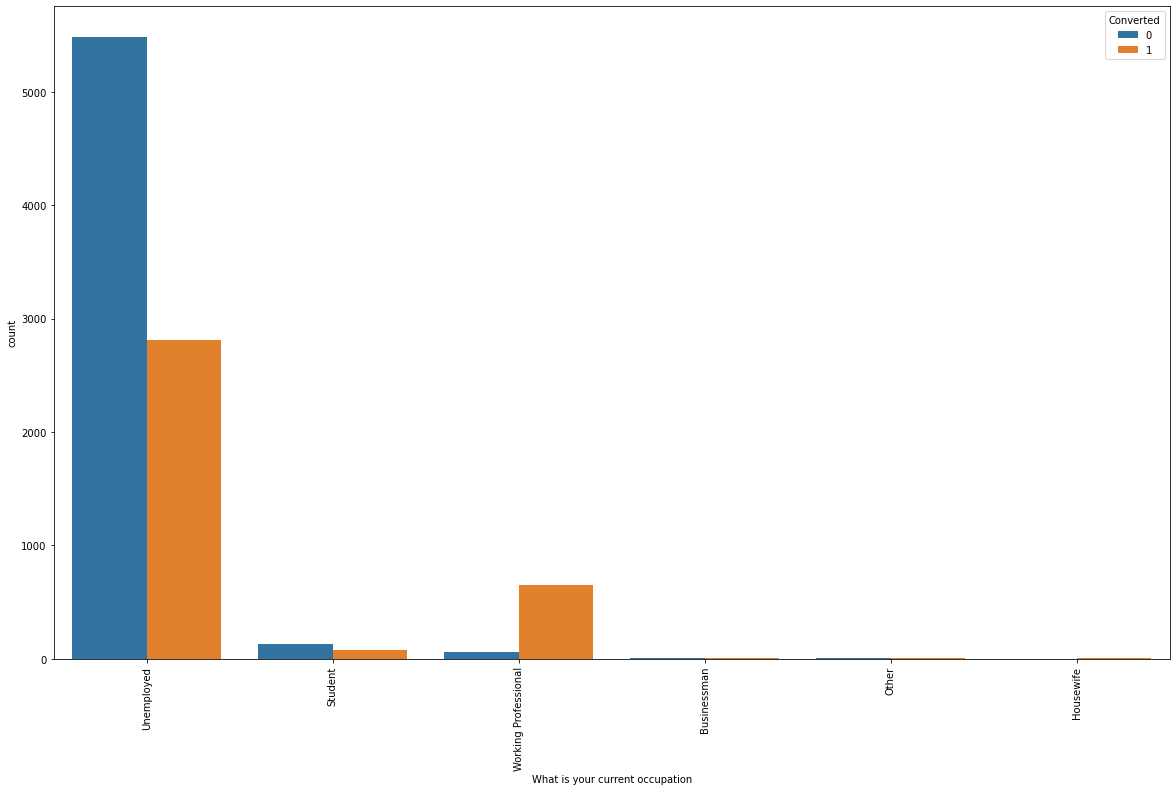

In [40]:
plt.figure(figsize=(20,12))
s1=sns.countplot(dataset['What is your current occupation'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Observation
1. working proffessional are highly joining the course
2. the unemployed are high in number

In [41]:
dataset['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
dataset['What matters most to you in choosing a course'].mode()[0]

'Better Career Prospects'

In [43]:
#replacing Nan values with Mode "Better Career Prospects"


dataset['What matters most to you in choosing a course'] = dataset['What matters most to you in choosing a course'].fillna(dataset['What matters most to you in choosing a course'].mode()[0])

In [44]:
dataset['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

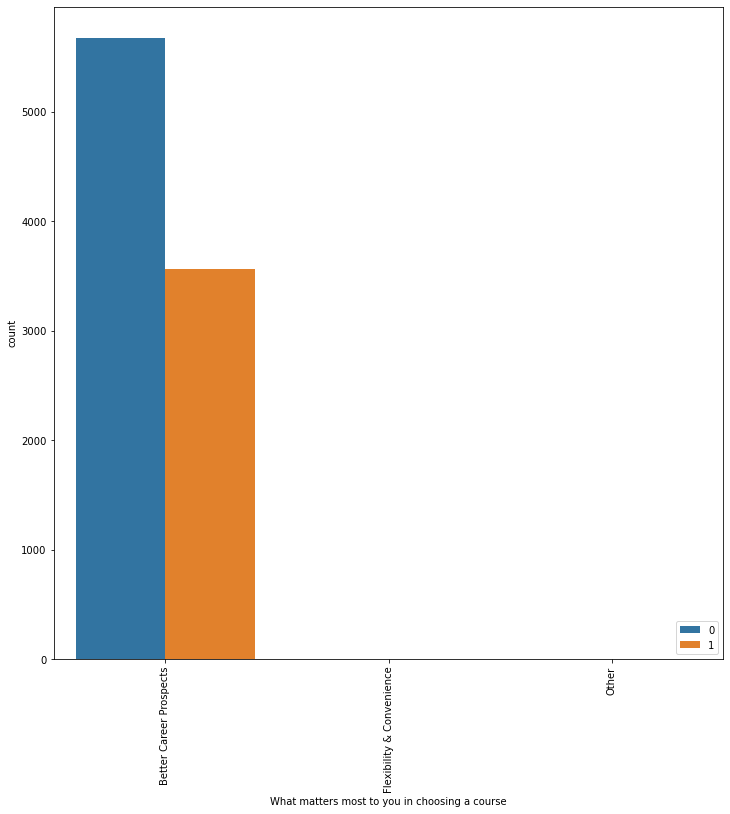

In [45]:
plt.figure(figsize=(12,12))
s1=sns.countplot(dataset['What matters most to you in choosing a course'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.legend(loc="lower right")
plt.show()

### drop What matters most to you in choosing a course as it is biased and its worth to drop

In [46]:
dataset.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [47]:
dataset.shape

(9240, 26)

In [48]:
#checking value counts of Tag variable
dataset['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [49]:
#replacing Nan values with "Not Specified"
dataset['Tags'] = dataset['Tags'].replace(np.nan,'Not Specified')

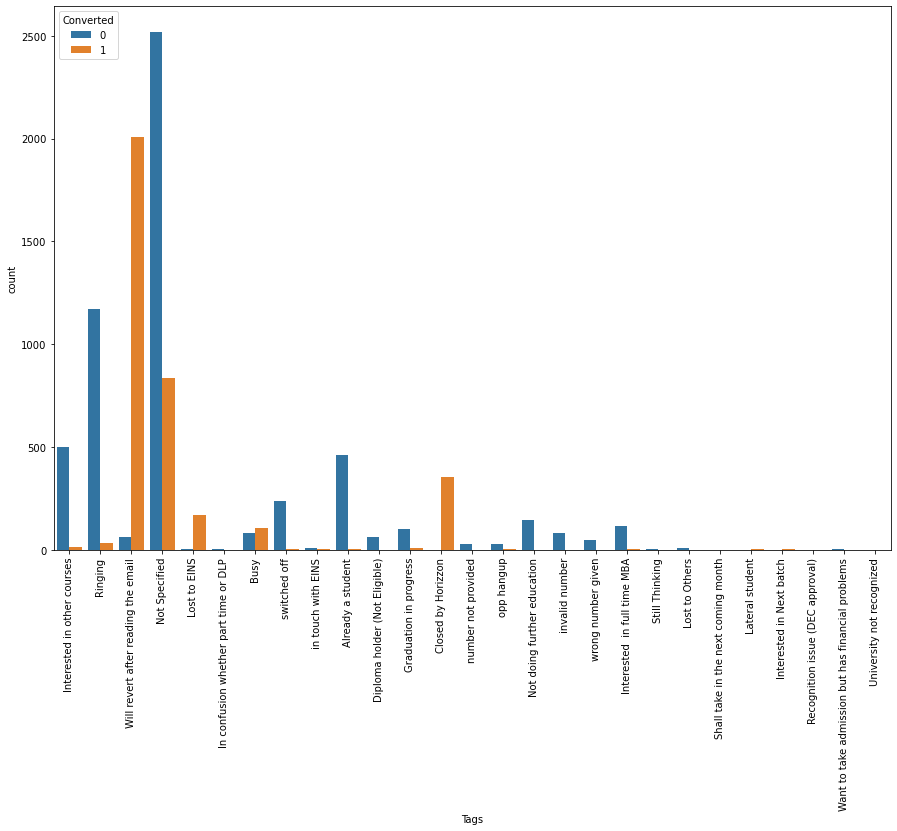

In [50]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,10))
s1=sns.countplot(dataset['Tags'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [51]:
## check percentage of null again

(dataset.isnull().sum()/dataset.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [52]:
## check values of city columns

dataset.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [53]:
dataset.City.mode()[0]

'Mumbai'

In [54]:
dataset.City.fillna('Mumbai', inplace=True)

In [55]:
dataset.City.value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

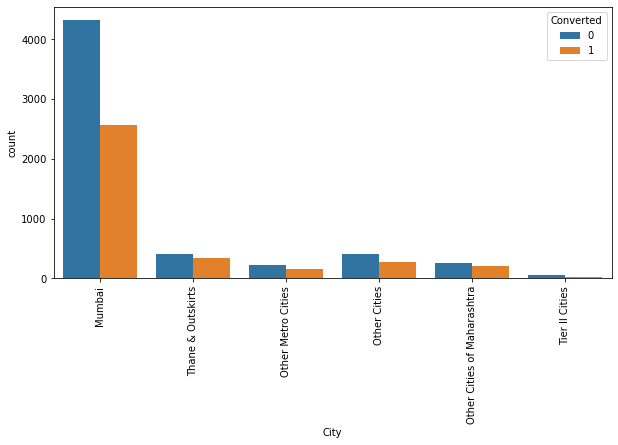

In [56]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(dataset.City, hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [57]:
dataset = dataset.dropna()

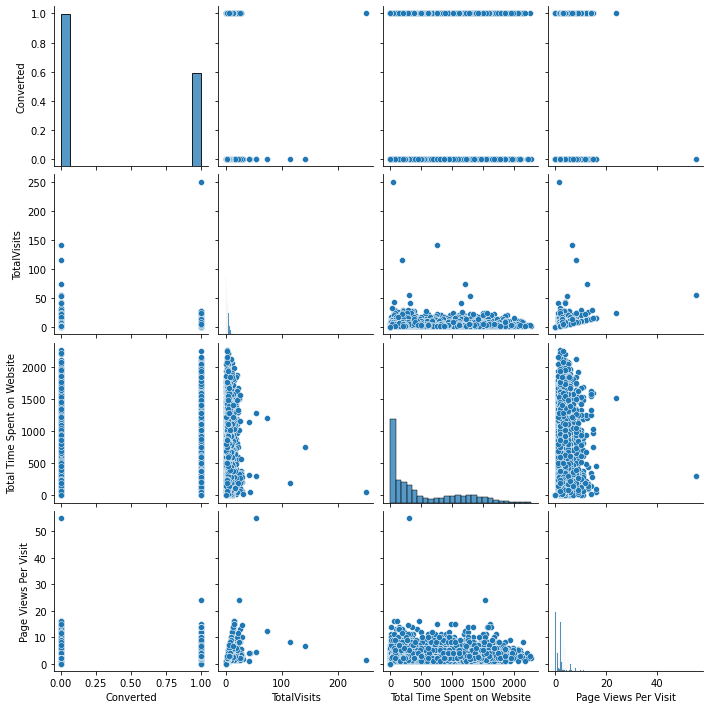

In [58]:
sns.pairplot(dataset)

In [59]:
## check percentage of null again

(dataset.isnull().sum()/dataset.shape[0])*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

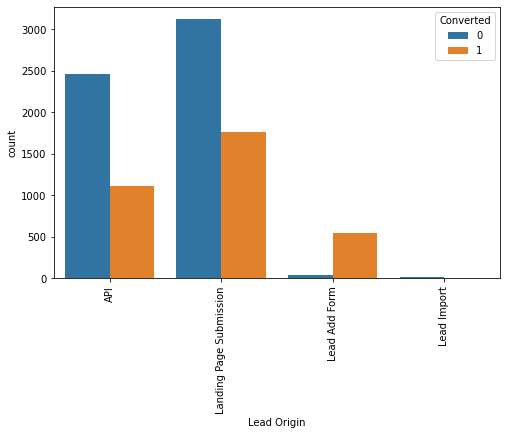

In [60]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(dataset['Lead Origin'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Observation

1. maximum leads are comming from landing page and coversion rate is also high

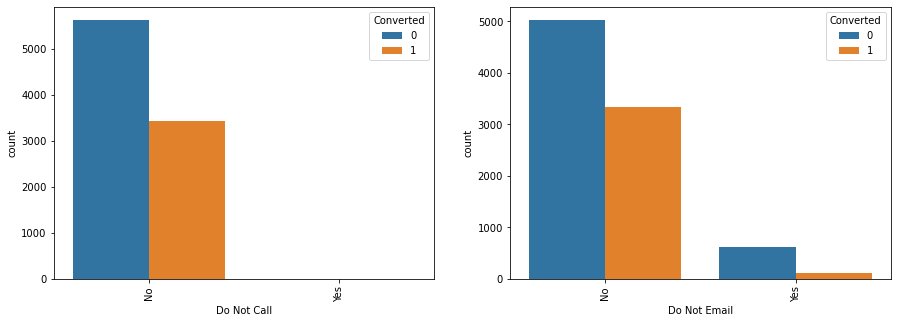

In [61]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

a1=plt.subplot(1, 2, 1)
a1=sns.countplot(dataset['Do Not Call'], hue=dataset.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

a2=plt.subplot(1, 2, 2)
a2=sns.countplot(dataset['Do Not Email'], hue=dataset.Converted)
a2.set_xticklabels(a2.get_xticklabels(),rotation=90)
plt.show()

## Checking of Imbalanced variables which are above 95% 

In [62]:
dataset['Do Not Call'].value_counts()/len(dataset['Do Not Call'])*100

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64

In [63]:
## As Do not call calumn is biased so it's not worthfull of taking it further

drop_imbalanced_col = ['Do Not Call']

In [64]:
dataset['Do Not Email'].value_counts()/len(dataset['Do Not Call'])*100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

In [65]:
dataset['Search'].value_counts()/len(dataset['Search'])*100

No     99.845713
Yes     0.154287
Name: Search, dtype: float64

In [66]:
drop_imbalanced_col.append('Search')
drop_imbalanced_col

['Do Not Call', 'Search']

In [67]:
dataset['Magazine'].value_counts()/len(dataset['Magazine'])*100

No    100.0
Name: Magazine, dtype: float64

In [68]:
drop_imbalanced_col.append('Magazine')
drop_imbalanced_col

['Do Not Call', 'Search', 'Magazine']

In [69]:
dataset['Newspaper Article'].value_counts()/len(dataset["Newspaper Article"])*100


No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64

In [70]:
drop_imbalanced_col.append('Newspaper Article')
drop_imbalanced_col

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article']

In [71]:
dataset['X Education Forums'].value_counts()/len(dataset["X Education Forums"])*100

No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64

In [72]:
drop_imbalanced_col.append('X Education Forums')
drop_imbalanced_col

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

In [73]:
dataset['Newspaper'].value_counts()/len(dataset["Newspaper"])*100

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64

In [74]:
drop_imbalanced_col.append('Newspaper')
drop_imbalanced_col

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

In [75]:
dataset['Digital Advertisement'].value_counts()/len(dataset["Digital Advertisement"])*100

No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64

In [76]:
dataset['Through Recommendations'].value_counts()/len(dataset["Through Recommendations"])*100

No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64

In [77]:
dataset['Receive More Updates About Our Courses'].value_counts()/len(dataset["Receive More Updates About Our Courses"])*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [78]:
dataset['Update me on Supply Chain Content'].value_counts()/len(dataset["Update me on Supply Chain Content"])*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [79]:
dataset['Get updates on DM Content'].value_counts()/len(dataset["Get updates on DM Content"])*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [80]:
dataset['I agree to pay the amount through cheque'].value_counts()/len(dataset["I agree to pay the amount through cheque"])*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [81]:
dataset['A free copy of Mastering The Interview'].value_counts()/len(dataset["A free copy of Mastering The Interview"])*100

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

In [82]:
dataset['Last Notable Activity'].value_counts()/len(dataset["Last Notable Activity"])*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [83]:
#clubbing lower frequency values

dataset['Last Notable Activity'] = dataset['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

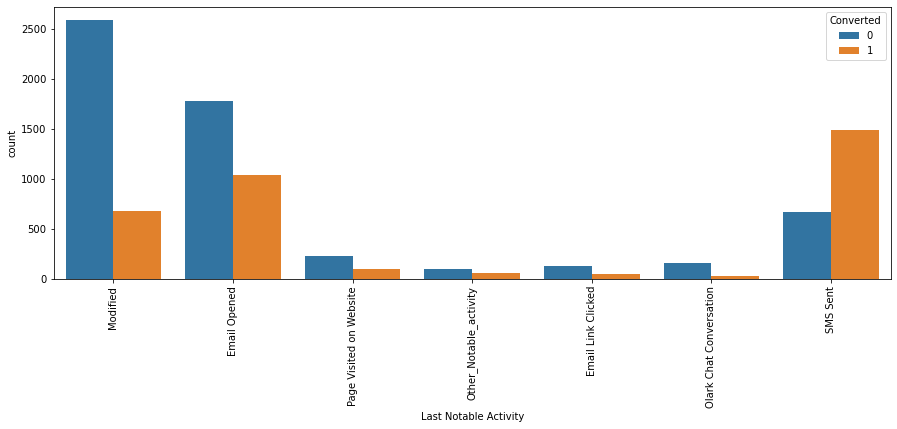

In [84]:

plt.figure(figsize = (15,5))
a1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = dataset)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

## Observation

1. Sms converstion is high
2. modified and Email number is high

In [85]:
### append columns in drop list

drop_imbalanced_col.extend(['Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])
drop_imbalanced_col

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [86]:
len(drop_imbalanced_col)

12

In [87]:
## drop imbalanced columns

dataset.drop(drop_imbalanced_col,axis=1,inplace=True)

In [88]:
dataset.shape

(9074, 14)

In [89]:
dataset['Converted'].value_counts()/len(dataset["Converted"])*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

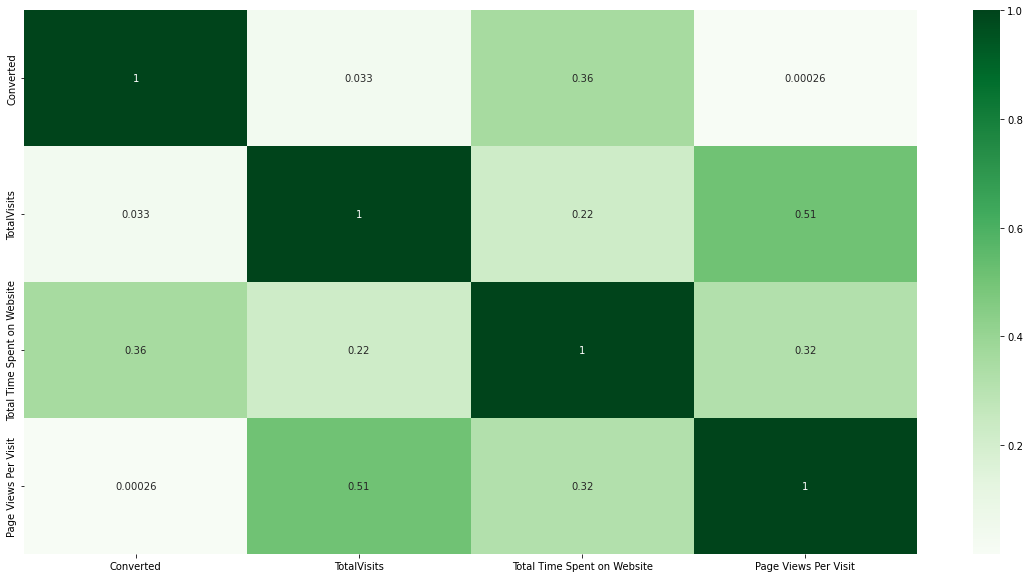

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),cmap='Greens', annot=True)
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='count'>

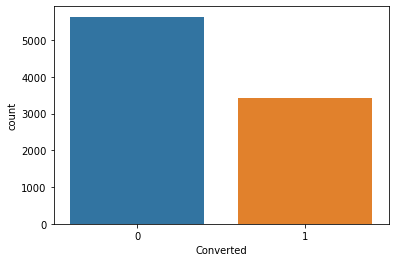

In [92]:
sns.countplot(data=dataset , x='Converted')

In [93]:
num_var = dataset.select_dtypes(include=['int','float']).columns
num_var

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

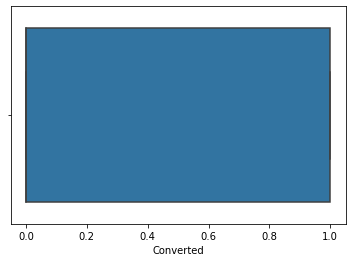

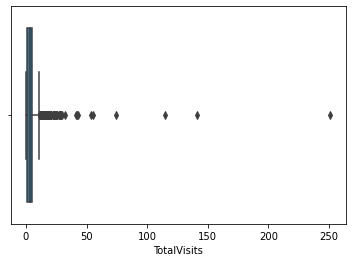

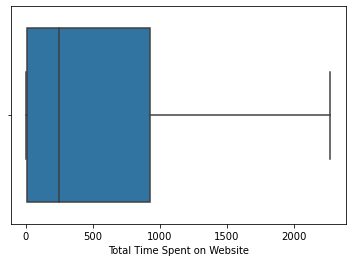

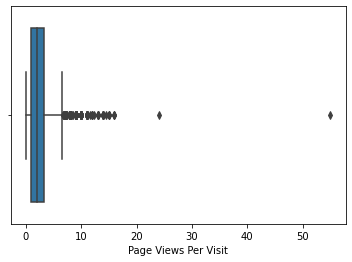

In [94]:
for i in num_var:
    sns.boxplot(data=dataset , x=i)
    plt.show()

### Observation 
1. Total visit is having outlier
2. total time spent on website is ok
3. page view per visit is having outlier

#### Treatment of outliers

In [95]:
#checking percentile values for "Total Visits"

dataset['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [96]:
len(dataset[dataset['TotalVisits'] > 20])

47

In [97]:
dataset = dataset[dataset['TotalVisits'] < 20]

In [98]:
dataset.shape

(9015, 14)

In [99]:
dataset['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9015.000000
mean        2.348163
std         2.061263
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [100]:
dataset= dataset[dataset['Page Views Per Visit'] < 10]

In [101]:
dataset.shape

(8948, 14)

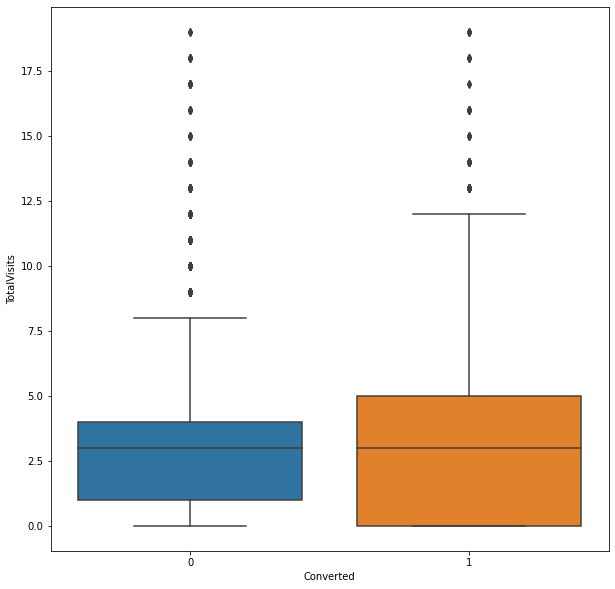

In [102]:
#checking Spread of "Total Visits" vs Converted variable
plt.figure(figsize=(10,10))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = dataset)
plt.show()


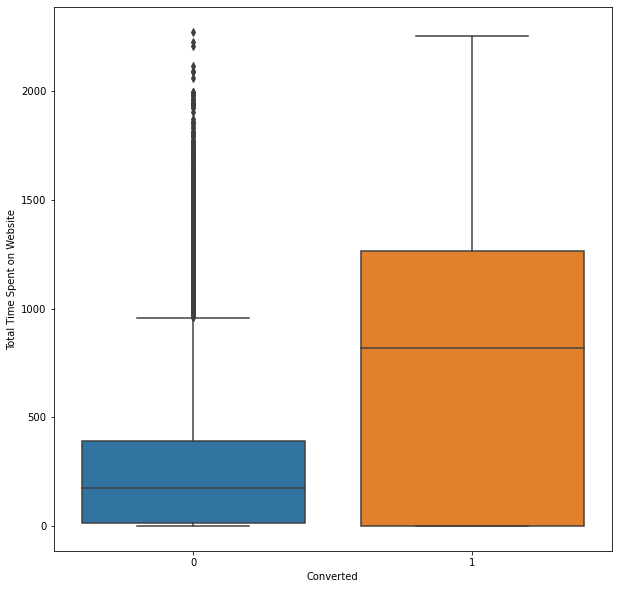

In [103]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
plt.figure(figsize=(10,10))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = dataset)
plt.show()


### Observation

As website conversion is high the website is more engaging

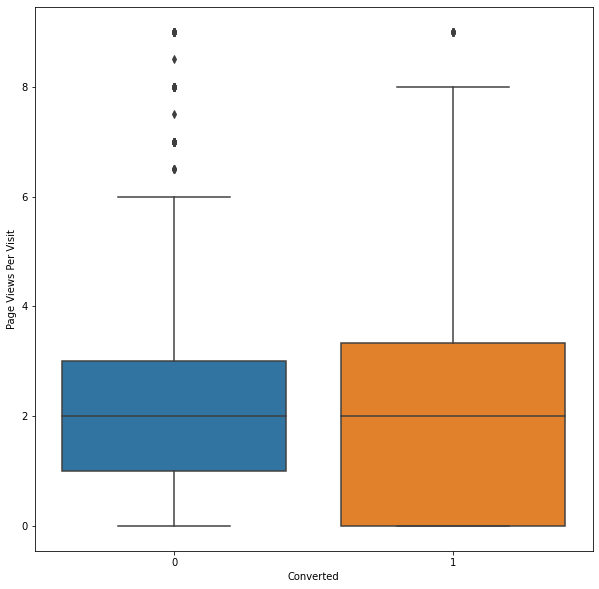

In [104]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
plt.figure(figsize=(10,10))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = dataset)
plt.show()


## Dummy variable creation

In [105]:
dataset.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [106]:
dataset.Tags.value_counts()

Not Specified                                        3286
Will revert after reading the email                  1989
Ringing                                              1164
Interested in other courses                           505
Already a student                                     462
Closed by Horizzon                                    293
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with 

In [107]:
#replacing tags with low frequency with "Other Tags"
dataset['Tags'] = dataset['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

dataset['Tags'] = dataset['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [108]:
dataset.Tags.value_counts()

Not Specified                          3286
Will revert after reading the email    1989
Other_Tags                             1359
Ringing                                1164
Interested in other courses             505
Closed by Horizzon                      293
Busy                                    183
Lost to EINS                            169
Name: Tags, dtype: int64

In [109]:
cat_var = dataset.select_dtypes(include="O").columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [110]:
dataset['Lead Source'].value_counts()

Google               2840
Direct Traffic       2508
Olark Chat           1752
Organic Search       1102
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [111]:
dataset['Lead Source'] = dataset['Lead Source'].replace('google','Google')
dataset['Lead Source'] = dataset['Lead Source'].replace('Facebook','Social Media')
dataset['Lead Source'] = dataset['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

In [112]:
dataset['Lead Source'].value_counts()

Google              2845
Direct Traffic      2508
Olark Chat          1752
Organic Search      1102
Reference            442
Welingak Website     129
Referral Sites       117
Social Media          33
Others                18
Live Chat              2
Name: Lead Source, dtype: int64

In [113]:
###. Let's start with Yes/ No varibale columns

dataset['Do Not Email']= dataset['Do Not Email'].map({'Yes':1, "No":0})
dataset['A free copy of Mastering The Interview']= dataset['A free copy of Mastering The Interview'].map({'Yes':1, "No":0})

In [114]:
dataset.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [115]:
cat_var = dataset.select_dtypes(include="O").columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [116]:
data = dataset.copy()

data = pd.get_dummies(data , drop_first=True)
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [117]:
data.shape

(8948, 67)

### Train _ Test split

In [118]:
X = data.drop('Converted',axis=1)
y = data['Converted']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6263 entries, 9233 to 5828
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6263 non-null   int64  
 1   TotalVisits                                           6263 non-null   float64
 2   Total Time Spent on Website                           6263 non-null   int64  
 3   Page Views Per Visit                                  6263 non-null   float64
 4   A free copy of Mastering The Interview                6263 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6263 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6263 non-null   uint8  
 7   Lead Origin_Lead Import                               6263 non-null   uint8  
 8   Lead Source_Google                                    6

In [122]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9233,-0.281548,3.306534,1.689199,0.168297,-0.680423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
777,-0.281548,-0.400859,0.904477,-0.148898,1.469673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3964,-0.281548,0.273213,1.268486,-0.148898,-0.680423,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
8116,-0.281548,-0.063823,-0.063164,0.379761,1.469673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6861,-0.281548,-1.074930,-0.888128,-1.206217,-0.680423,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [123]:


num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2324,-0.281548,0.947284,1.308728,-0.148898,1.469673,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
1215,-0.281548,-1.074930,-0.888128,-1.206217,-0.680423,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6148,-0.281548,-0.400859,2.073329,-0.148898,-0.680423,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1969,-0.281548,-1.074930,-0.888128,-1.206217,-0.680423,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378,-0.281548,-0.400859,-0.200353,-0.148898,-0.680423,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Model Building by RFE

In [124]:
import statsmodels.api as sm

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
logreg = LogisticRegression()

In [127]:
from sklearn.feature_selection import RFE

In [128]:
rfe = RFE(logreg, n_features_to_select=17)

rfe = rfe.fit(X_train, y_train)

In [129]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True])

In [130]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 16),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 7),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Marked Spam', False, 42),
 ('Last Activity_Email Opened', False, 22),
 ('Last Activity_Email Received', False, 45),
 ('Last Activity_Form Submitt

In [131]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [132]:
X_train = X_train[col]
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
9233,1.689199,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
777,0.904477,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3964,1.268486,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8116,-0.063164,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
6861,-0.888128,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [133]:
#BUILDING MODEL #1 by adding constant

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6263
Model:                            GLM   Df Residuals:                     6245
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1226.1
Date:                Sun, 22 Jan 2023   Deviance:                       2452.2
Time:                        17:35:30   Pearson chi2:                 9.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6092
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9026      0.135    -21.489      0.000      -3.167      -2.638
Total Time Spent on Website                              1.1185      0.062     17.950      0.000       0.996       1.241
Lead Origin_Lead Add Form                                1.9634      0.456      4.308      0.000       1.070       2.857
Lead Source_Olark Chat                                   1.2427      0.147      8.482      0.000       0.956       1.530
Lead Source_Welingak Website                             3.6726      0.870      4.219      0.000       1.967       5.379
Last Activity_Email Bounced                             -1.9739      0.611     -3.233      0.001      -3.170      -0.777
Last Activity_Had a Phone Conversation                   6.0883      1.769      3.441      0.001       2.620       9.556
Last Activity_SMS Sent                                   1.2225      0.218      5.616      0.000       0.796       1.649
What is your current occupation_Working Professional     0.8254      0.397      2.079      0.038       0.047       1.604
Tags_Closed by Horizzon                                  6.8959      1.021      6.751      0.000       4.894       8.898
Tags_Interested in other courses                        -1.7948      0.355     -5.058      0.000      -2.490      -1.099
Tags_Lost to EINS                                        5.7004      0.612      9.311      0.000       4.500       6.900
Tags_Other_Tags                                         -2.6594      0.225    -11.824      0.000      -3.100      -2.219
Tags_Ringing                                            -3.7705      0.262    -14.392      0.000      -4.284      -3.257
Tags_Will revert after reading the email                 4.2468      0.193     22.052      0.000       3.869       4.624
Last Notable Activity_Email Opened                       1.3721      0.142      9.656      0.000       1.094       1.651
Last Notable Activity_Other_Notable_activity             1.3725      0.477      2.876      0.004       0.437       2.308
Last Notable Activity_SMS Sent                           2.2184      0.214     10.351      0.000       1.798       2.638
========================================================================================================================
"""

### Observation

1. since all the P values are less and as we require these features are good to consider

## Lets check VIF for multi colinearity

In [134]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,5.18
16,Last Notable Activity_SMS Sent,5.07
13,Tags_Will revert after reading the email,2.05
1,Lead Origin_Lead Add Form,1.87
14,Last Notable Activity_Email Opened,1.47
0,Total Time Spent on Website,1.46
7,What is your current occupation_Working Profes...,1.35
3,Lead Source_Welingak Website,1.35
2,Lead Source_Olark Chat,1.32
12,Tags_Ringing,1.26


In [136]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9233    0.998739
777     0.994413
3964    0.984253
8116    0.100488
6861    0.217357
987     0.097222
4913    0.997156
8897    0.997156
2717    0.000568
2941    0.217357
dtype: float64

In [137]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.98738892e-01, 9.94412838e-01, 9.84253100e-01, 1.00487553e-01,
       2.17356800e-01, 9.72216681e-02, 9.97156361e-01, 9.97156361e-01,
       5.68391563e-04, 2.17356800e-01])

In [138]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['y_train'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,y_train
0,1,0.998739,9233
1,1,0.994413,777
2,1,0.984253,3964
3,0,0.100488,8116
4,0,0.217357,6861


In [139]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,y_train,Predicted
0,1,0.998739,9233,1
1,1,0.994413,777,1
2,1,0.984253,3964,1
3,0,0.100488,8116,0
4,0,0.217357,6861,0


In [140]:
class test:
    
    def __init__(self,y_pred,y_test):
        self.y_pred = y_pred
        self.y_test = y_test
        
        
    def confustion_metric(self):
        return metrics.confusion_matrix(y_pred,y_test)
    
    def sensitivity(self):
        TP = self.confustion_metric()[1,1] #true positive
        TN = self.confustion_metric()[0,0] #true negative
        FP = self.confustion_metric()[0,1] #false postive
        FN = self.confustion_metric()[1,0] #false negative
        return TP/(TP+FN)
    
    def specifity(self):
        TP = self.confustion_metric()[1,1]
        TN = self.confustion_metric()[0,0]
        FP = self.confustion_metric()[0,1]
        FN = self.confustion_metric()[1,0]
        return TN/(TN +FP)
    
    def Flase_Positive_rate(self):
        TP = self.confustion_metric()[1,1]
        TN = self.confustion_metric()[0,0]
        FP = self.confustion_metric()[0,1]
        FN = self.confustion_metric()[1,0]
        return FP/(TP+FP)
    
    def Positive_predicitve_value(self):
        TP = self.confustion_metric()[1,1] 
        TN = self.confustion_metric()[0,0]
        FP = self.confustion_metric()[0,1]
        FN = self.confustion_metric()[1,0]
        return TP/(TP +FP)
    
    def Negative_predictive_value(self):
        TP = self.confustion_metric()[1,1]
        TN = self.confustion_metric()[0,0]
        FP = self.confustion_metric()[0,1]
        FN = self.confustion_metric()[1,0]
        return FN/(TN +FN)
        
        
    

In [141]:
con = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [142]:
con

array([[3695,  168],
       [ 295, 2105]])

In [143]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.9260737665655436

In [144]:
TP = con[1,1] # true positive 
TN = con[0,0] # true negatives
FP = con[0,1] # false positives
FN = con[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8770833333333333

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9565104840797308

In [147]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04348951592026922


In [148]:
# positive predictive value 
print (TP / float(TP+FP))

0.9260888693356797


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9260651629072681


In [150]:
def draw_roc_curve_plot( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

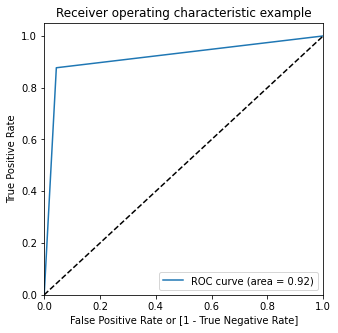

In [151]:
draw_roc_curve_plot(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [152]:
## Let's find cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,y_train,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998739,9233,1,1,1,1,1,1,1,1,1,1,1
1,1,0.994413,777,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984253,3964,1,1,1,1,1,1,1,1,1,1,1
3,0,0.100488,8116,0,1,1,0,0,0,0,0,0,0,0
4,0,0.217357,6861,0,1,1,1,0,0,0,0,0,0,0


## Observation 

0.3 Seems good point

In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383203  1.000000  0.000000
0.1   0.1  0.849274  0.967917  0.775563
0.2   0.2  0.904199  0.951667  0.874709
0.3   0.3  0.923519  0.914583  0.929071
0.4   0.4  0.924477  0.900000  0.939684
0.5   0.5  0.926074  0.877083  0.956510
0.6   0.6  0.926393  0.857500  0.969195
0.7   0.7  0.914578  0.810833  0.979032
0.8   0.8  0.906914  0.785000  0.982656
0.9   0.9  0.884879  0.714583  0.990681


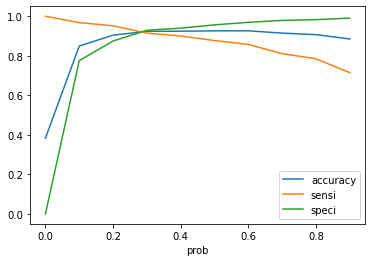

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [155]:

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,y_train,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.998739,9233,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.994413,777,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984253,3964,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.100488,8116,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.217357,6861,0,1,1,1,0,0,0,0,0,0,0,0


In [156]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','y_train','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,y_train,final_Predicted,Lead_Score
0,1,0.998739,9233,1,100
1,1,0.994413,777,1,99
2,1,0.984253,3964,1,98
3,0,0.100488,8116,0,10
4,0,0.217357,6861,0,22


In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.923519080312949

In [158]:
confusion1= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion1

array([[3589,  274],
       [ 205, 2195]])

In [159]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9145833333333333

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.9290706704633704

In [162]:
from sklearn.metrics import precision_score,recall_score

In [163]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8890238963142972

In [164]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9145833333333333

### Observation

1. Accuracy_score : 92%

2. sensitivity : 91 %

3. specificity : 92%

In [165]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

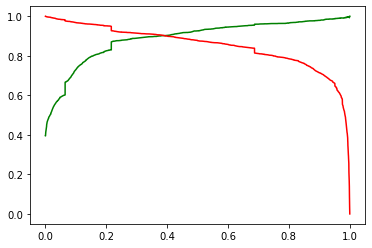

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [167]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2324,1.308728,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1215,-0.888128,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6148,2.073329,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1969,-0.888128,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
378,-0.200353,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Test set

In [168]:
X_test_sm = sm.add_constant(X_test)

In [169]:
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2324,1.0,1.308728,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1215,1.0,-0.888128,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6148,1.0,2.073329,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1969,1.0,-0.888128,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
378,1.0,-0.200353,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [170]:
X_train_sm.drop('const',axis=1,inplace=True)

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
loger = LogisticRegression(C=0.3)

In [173]:
loger.fit(X_train_sm,y_train)

LogisticRegression(C=0.3)

In [174]:
loger.score(X_train_sm,y_train)

0.9259140986747565

In [175]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [176]:
X_test = X_test[col]
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2324,1.0,1.308728,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1215,1.0,-0.888128,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6148,1.0,2.073329,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1969,1.0,-0.888128,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
378,1.0,-0.200353,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [177]:
X_test_sm.drop('const',inplace=True,axis = 1)

In [178]:
y_pred_train = loger.predict(X_train_sm)
y_pred_train

array([1, 1, 1, ..., 0, 1, 0])

In [179]:
y_pred = loger.predict(X_test_sm)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [180]:
loger.score(X_test_sm,y_test)

0.9318435754189944

In [181]:
metrics.confusion_matrix(y_pred,y_test)

array([[1632,  111],
       [  72,  870]])

In [182]:
metrics.accuracy_score(y_pred,y_test)

0.9318435754189944

In [183]:
a = test(y_pred_train,y_train)

In [184]:
a.confustion_metric()

array([[1632,  111],
       [  72,  870]])

In [185]:
a.sensitivity()

0.9235668789808917

In [186]:
a.specifity()

0.9363166953528399

In [187]:
a.Flase_Positive_rate()

0.11314984709480122

In [188]:
a.Positive_predicitve_value()

0.8868501529051988

In [189]:
a.Negative_predictive_value()

0.04225352112676056

### Observation On test set

1. accuracy_score : 93%
2. sensitivity score : 92%
3. specicity score : 93%

## Our all the model is good

## our model is providing good converstion rate